In [ ]:
!pip install diffusers transformers accelerate opencv-python torch torchvision lpips pytorch-msssim

In [1]:
import gdown
import os
import zipfile
import numpy as np
import cv2
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
import lpips
from pytorch_msssim import ssim
from torchvision.transforms.functional import to_tensor
from matplotlib import pyplot as plt

# Load and extract the model weights

In [10]:
gdown.download("https://drive.google.com/uc?id=1METjU_ewfohrjdGxf88rkmi2BQPs0sC3", "trained_model.zip", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1METjU_ewfohrjdGxf88rkmi2BQPs0sC3
From (redirected): https://drive.google.com/uc?id=1METjU_ewfohrjdGxf88rkmi2BQPs0sC3&confirm=t&uuid=3a74e62b-71ce-430e-8644-85eb62e050fb
To: E:\CIS6200\CIS6200-Project\sa-dataset\trained_model.zip
100%|██████████| 1.34G/1.34G [00:45<00:00, 29.8MB/s]


'trained_model.zip'

In [11]:
with zipfile.ZipFile("trained_model.zip", "r") as zip_ref:
    zip_ref.extractall("./")

# Load the pipeline

In [12]:
controlnet = ControlNetModel.from_pretrained("./trained_model", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

E:\CIS6200\sa1b\lib\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


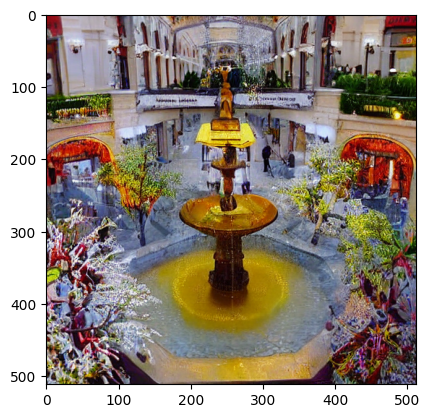

In [13]:
gray = Image.open("test_split/1_gray.jpg")
prompt = "The fountain is golden, the water in the fountain is red"
generated = pipe(prompt, gray, guess_mode=False, guidance_scale=4.0).images[0]
plt.imshow(generated)